# 1.0 Data Exploration

## Imports

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

# user defined methods
import sys
sys.path.append('../utils')

from visualization import plot_histogram, plot_bar

### upload 'shhs1-dataset-0.20.0.csv' and 'shhs2-dataset-0.20.0.csv'

In [2]:
shhs1 = pd.read_csv('../../data/raw/shhs1-dataset-0.20.0.csv', encoding='cp1252', engine='python')

In [3]:
shhs1.shape

(5804, 1271)

In [3]:
shhs2 = pd.read_csv('../../data/raw/shhs2-dataset-0.20.0.csv', encoding='cp1252', engine='python')

In [5]:
shhs2.shape

(4311, 1274)

Dataset: events, domains, forms, variables, harmonized, followup, shhs1, shhs2

# EDA

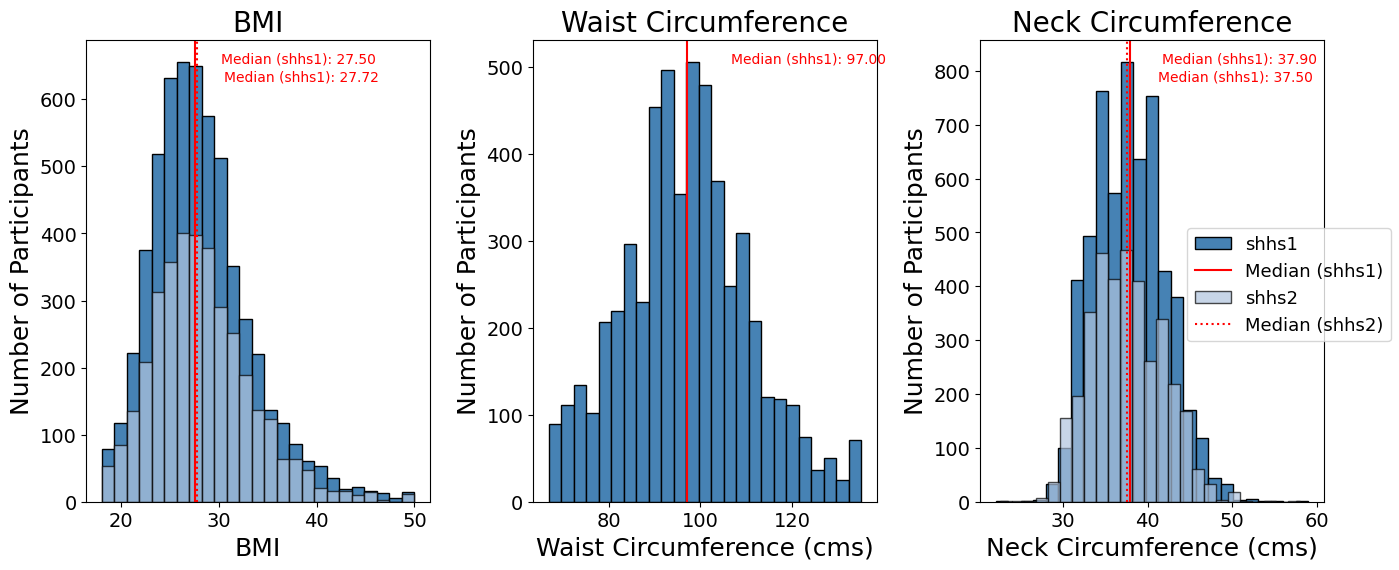

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Plot for BMI
plot_histogram(ax[0], shhs1['bmi_s1'], "BMI", "BMI", shhs2['bmi_s2'])

# Plot for Waist circumference (with only shhs1 data)
plot_histogram(ax[1], shhs1['waist'], "Waist Circumference", "Waist Circumference (cms)")

# Plot for Neck circumference
plot_histogram(ax[2], shhs1['neck20'], "Neck Circumference", "Neck Circumference (cms)", shhs2['pm212a'])

# Consolidate legends with increased font size
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right', fontsize=13)

# Adjust layout
plt.subplots_adjust(right=0.95, wspace=0.3)

# Show plot
plt.savefig('../../vizualizations/body measurement.jpg', format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [4]:
# define CSA patient severity
csa_1 = shhs1[(shhs1['ahi_c0h4'] >= 5) & (shhs1['ahi_c0h4'] > shhs1['ahi_o0h4'])]
csa_2 = shhs2[(shhs2['ahi_c0h4'] >= 5) & (shhs2['ahi_c0h4'] > shhs2['ahi_o0h4'])]

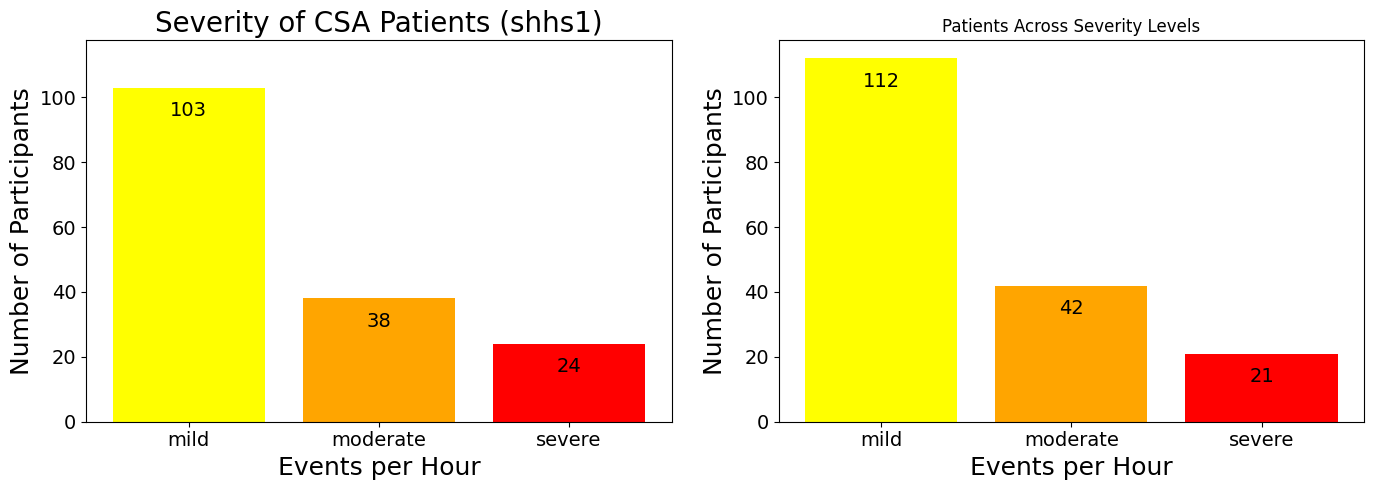

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=True)
datasets = [csa_1, csa_2]
titles = ['Severity of CSA Patients (shhs1)', 'Severity of CSA Patients (shhs2)']
bins = [5, 15, 30, np.inf]
bin_labels = ['mild', 'moderate', 'severe']
colors = ['yellow', 'orange', 'red']

for ax, data, title in zip(axes, datasets, titles):
    plot_bar(ax, data['ahi_c0h4'], title, bins, bin_labels, colors)

# Ensure the second chart's y-axis displays the ticks
axes[1].tick_params(axis='y', which='both', left=True, labelleft=True)

plt.title("Patients Across Severity Levels")
plt.subplots_adjust(right=0.95, wspace=10)
plt.tight_layout()
plt.savefig('../../vizualizations/severity across datasets.png', format='png', dpi=300)
plt.show()

NameError: name 'data' is not defined